In [1]:
import pandas as pd
from math import floor


# Configuration

In [2]:
MAX_CLOBCHACK_COUNT = 10000  # stop condition for clobchackizer
SAMPLE_SIZE = 0.001 # fir visualization purposes

# Load the data

In [3]:
data = pd.read_csv('../data/2_column.csv');
len(data)

1000000

In [14]:
data.head()

,A,B
0,98,181
1,132,200
2,120,219
3,90,189
4,107,201


# Clobchackizer

In [4]:
def clobchackize(data, max_size, result=[]):
    column_to_cut = data.var().idxmax()
    size_of_data = len(data[column_to_cut])
    
    lower_part = data[data[column_to_cut] <= data[column_to_cut].median()]
    higher_part = data[data[column_to_cut] > data[column_to_cut].median()]    
    
    size_of_lower_part = len(lower_part[column_to_cut])
    size_of_higher_part = len(higher_part[column_to_cut])
    
    if size_of_lower_part == size_of_data:
        lower_part = data[:floor(size_of_data/2)]
        higher_part = data[floor(size_of_data/2):]
    
    if size_of_lower_part > max_size:
        clobchackize(lower_part, max_size, result)
    else:    
        clobchack = [list(lower_part.min()), list(lower_part.max()-lower_part.min())]
        result.append(clobchack)
    
    if size_of_higher_part > max_size:
        clobchackize(higher_part, max_size,result)
    else:
        clobchack = [list(higher_part.min()), list(higher_part.max()-higher_part.min())]
        result.append(clobchack)
        
    

# Run!

In [5]:
result = []
print("starting!")
clobchackize(data, MAX_CLOBCHACK_COUNT, result)
print("DONE!")

starting!
DONE!


# Ignore these cells...

In [6]:
len(result)

138

In [7]:
result[0]

[[1, 122], [69, 48]]

In [8]:
result[0][0]

[1, 122]

In [9]:
result[0][0][1]

122

# Visualize (using sample)

In [10]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline


## Generate the sample

In [11]:
sample_data = data.sample(frac=SAMPLE_SIZE)

## Show the sample

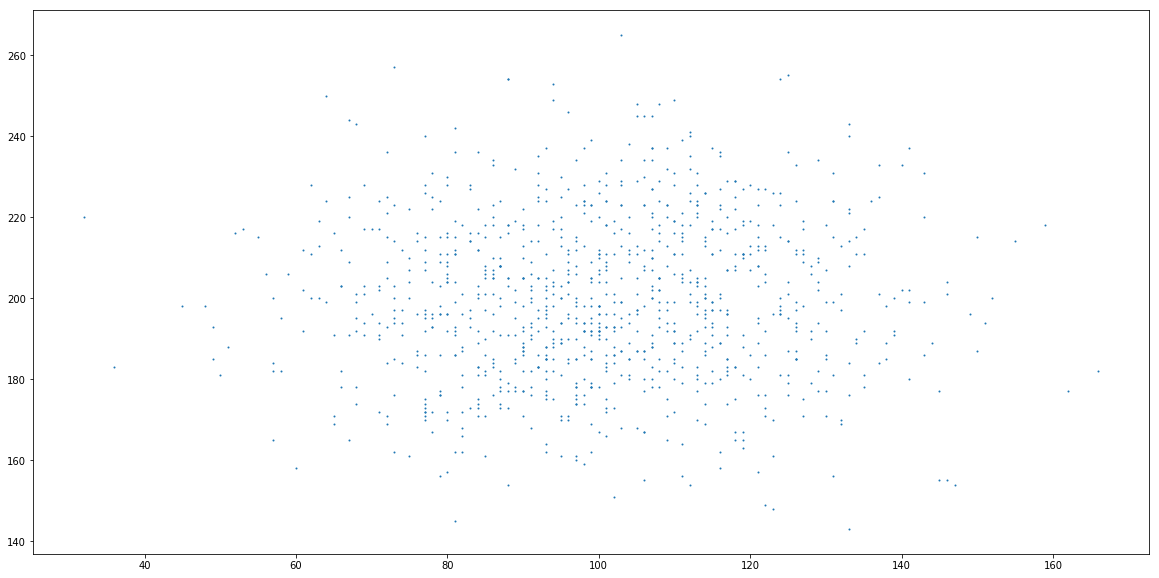

In [12]:
plt.figure(figsize=(20,10))
plt.scatter(sample_data['A'], sample_data['B'], s=1)
    
plt.show()

## Show the clobchacks!

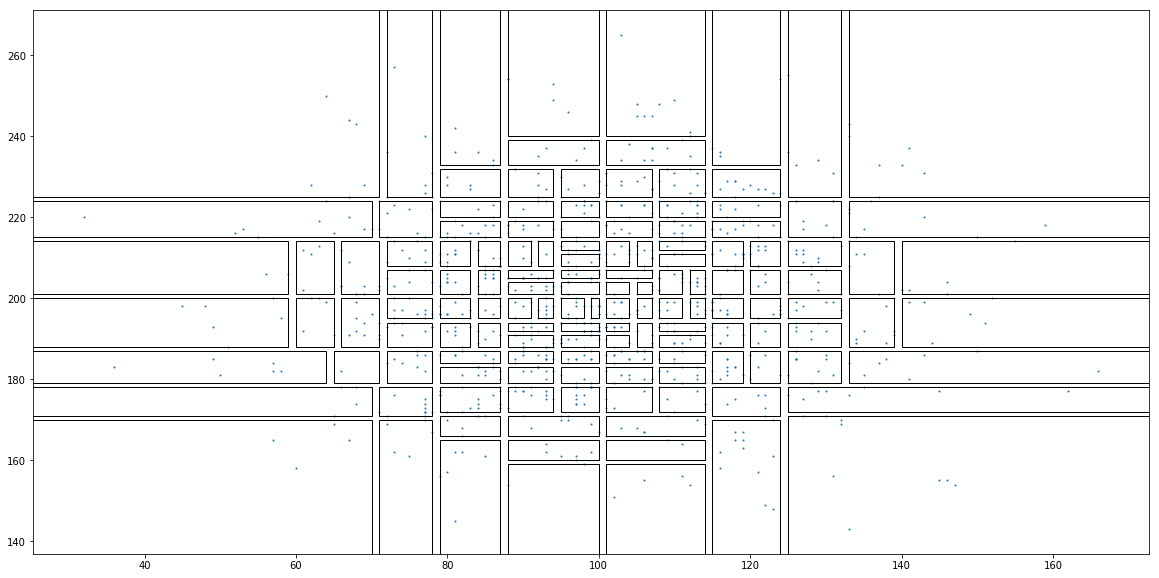

In [13]:
fig, ax = plt.subplots(figsize=(20,10))

ax.scatter(sample_data['A'], sample_data['B'], s=1)

for i in range(len(result)):
    p = patches.Rectangle(
        (result[i][0][0], result[i][0][1]), result[i][1][0], result[i][1][1],
        fill=False
        )

    ax.add_patch(p)

plt.show()